In [ ]:
import pandas as pd
print (pd.__version__)
import numpy as np
import matplotlib.pyplot as plt
import os


2.2.3


In [ ]:
stock_names = ['amzn']
folder = 'stock_market_dataset'

def create_multi_indexed_df(stock_names, folder):       # self-explanatory function.
    all_stocks = pd.DataFrame()         # create empty df to store values.
    
    # go over all stocks
    for stock in stock_names:
        
        file_path = os.path.join(folder, (stock + '.us.csv'))
        df = pd.read_csv(file_path)
        df['Ticker'] = stock        # add this column to create multi-index later.
        
        all_stocks = pd.concat(     # add stock data to df
            [all_stocks, df], 
            ignore_index = True
        )

    all_stocks['Date'] = pd.to_datetime(all_stocks['Date'])     # convert dates to datetime
    all_stocks = all_stocks.set_index(['Ticker', 'Date'])       # create multi-index
    
    return all_stocks

df = create_multi_indexed_df(stock_names, folder)
df.head(15)


Open  High   Low  Close    Volume  OpenInt
Ticker Date                                                  
amzn   1997-05-16  1.97  1.98  1.71   1.73  14700000        0
       1997-05-19  1.76  1.77  1.62   1.71   6106800        0
       1997-05-20  1.73  1.75  1.64   1.64   5467200        0
       1997-05-21  1.64  1.65  1.38   1.43  18853200        0
       1997-05-22  1.44  1.45  1.31   1.40  11776800        0
       1997-05-23  1.41  1.52  1.33   1.50  15937200        0
       1997-05-27  1.51  1.65  1.46   1.58   8697600        0
       1997-05-28  1.62  1.64  1.53   1.53   4574400        0
       1997-05-29  1.54  1.54  1.48   1.51   3472800        0
       1997-05-30  1.50  1.51  1.48   1.50   2594400        0
       1997-06-02  1.51  1.53  1.50   1.51    591600        0
       1997-06-03  1.53  1.53  1.48   1.48   1183200        0
       1997-06-04  1.48  1.49  1.40   1.42   3080400        0
       1997-06-05  1.42  1.54  1.38   1.54   5672400        0
       1997-06-06  1.52  1.71  1.51   1.66   7807200        0

In [182]:
def fill_missing_dates(df):
    stocks = df.index.get_level_values('Ticker').unique()
    res = pd.DataFrame()
    for stock in stocks:
        df1 = df.loc[stock]
        # print(stock, df1)
        all_dates = pd.date_range(
            df1.index.get_level_values('Date').min(),
            df1.index.get_level_values('Date').max()
        )
        df1 = df1.reindex(all_dates)
        # print(df1)
        df1['Ticker'] = stock
        df1 = df1.reset_index(names = ['Date'])
        # print(df1)
        res = pd.concat([res, df1], ignore_index=True)
    
    res = res.set_index(['Ticker', 'Date'])
    res = res.interpolate()

    return res
        
df_full = fill_missing_dates(df)
df_full.head(15)


Open    High     Low     Close      Volume  OpenInt
Ticker Date                                                            
amzn   1997-05-16  1.970  1.9800  1.7100  1.730000  14700000.0      0.0
       1997-05-17  1.900  1.9100  1.6800  1.723333  11835600.0      0.0
       1997-05-18  1.830  1.8400  1.6500  1.716667   8971200.0      0.0
       1997-05-19  1.760  1.7700  1.6200  1.710000   6106800.0      0.0
       1997-05-20  1.730  1.7500  1.6400  1.640000   5467200.0      0.0
       1997-05-21  1.640  1.6500  1.3800  1.430000  18853200.0      0.0
       1997-05-22  1.440  1.4500  1.3100  1.400000  11776800.0      0.0
       1997-05-23  1.410  1.5200  1.3300  1.500000  15937200.0      0.0
       1997-05-24  1.435  1.5525  1.3625  1.520000  14127300.0      0.0
       1997-05-25  1.460  1.5850  1.3950  1.540000  12317400.0      0.0
       1997-05-26  1.485  1.6175  1.4275  1.560000  10507500.0      0.0
       1997-05-27  1.510  1.6500  1.4600  1.580000   8697600.0      0.0
       1997-05-28  1.620  1.6400  1.5300  1.530000   4574400.0      0.0
       1997-05-29  1.540  1.5400  1.4800  1.510000   3472800.0      0.0
       1997-05-30  1.500  1.5100  1.4800  1.500000   2594400.0      0.0

In [ ]:
def daily_returns(df, column = 'Close'):
    for stock in stock_names:
        returns_col = [0]
        req_col = df.loc[stock][column].values
        for date in range(len(req_col)-1):
            returns_col.append(req_col[date+1]/req_col[date] - 1)
        
        df.loc[(stock, slice(None)), f'{column}_daily_returns'] = returns_col
    return df

def inverse_daily_returns(df, column = 'Close', column2 = 'Close_daily_returns'):
    for stock in stock_names:
        inverse_col = [0]
        returns_col = df.loc[stock][column2].values
        val_col = df.loc[stock][column].values
        for date in range(len(val_col)-1):
            inverse_col.append((1 + returns_col[date+1])*val_col[date])
        
        df.loc[(stock, slice(None)), f'{column2}_inverse'] = inverse_col
    return df

daily_returns(df_full, 'Close').head()


Open  High   Low     Close      Volume  OpenInt  \
Ticker Date                                                          
amzn   1997-05-16  1.97  1.98  1.71  1.730000  14700000.0      0.0   
       1997-05-17  1.90  1.91  1.68  1.723333  11835600.0      0.0   
       1997-05-18  1.83  1.84  1.65  1.716667   8971200.0      0.0   
       1997-05-19  1.76  1.77  1.62  1.710000   6106800.0      0.0   
       1997-05-20  1.73  1.75  1.64  1.640000   5467200.0      0.0   

                   Close_daily_returns  
Ticker Date                             
amzn   1997-05-16             0.000000  
       1997-05-17            -0.003854  
       1997-05-18            -0.003868  
       1997-05-19            -0.003883  
       1997-05-20            -0.040936

In [ ]:
def moving_avg(df, days, column):
    for stock in stock_names:
        avg_col = []
        req_col = df.loc[stock][column].values
        for date in range(len(req_col)):
            window = req_col[max(0, date - days + 1) : date + 1]
            moving_avg = np.mean(window)    # use np.nanmean if df isn't clean.
            avg_col.append(moving_avg)
        
        df.loc[(stock, slice(None)), f'{column}_{days}_day_avg'] = avg_col
    return df

moving_avg(df_full, 7, 'Close')
moving_avg(df_full, 30, 'Close').head(10)


Open    High     Low     Close      Volume  OpenInt  \
Ticker Date                                                               
amzn   1997-05-16  1.970  1.9800  1.7100  1.730000  14700000.0      0.0   
       1997-05-17  1.900  1.9100  1.6800  1.723333  11835600.0      0.0   
       1997-05-18  1.830  1.8400  1.6500  1.716667   8971200.0      0.0   
       1997-05-19  1.760  1.7700  1.6200  1.710000   6106800.0      0.0   
       1997-05-20  1.730  1.7500  1.6400  1.640000   5467200.0      0.0   
       1997-05-21  1.640  1.6500  1.3800  1.430000  18853200.0      0.0   
       1997-05-22  1.440  1.4500  1.3100  1.400000  11776800.0      0.0   
       1997-05-23  1.410  1.5200  1.3300  1.500000  15937200.0      0.0   
       1997-05-24  1.435  1.5525  1.3625  1.520000  14127300.0      0.0   
       1997-05-25  1.460  1.5850  1.3950  1.540000  12317400.0      0.0   

                   Close_daily_returns  Close_7_day_avg  Close_30_day_avg  
Ticker Date                                                                
amzn   1997-05-16             0.000000         1.730000          1.730000  
       1997-05-17            -0.003854         1.726667          1.726667  
       1997-05-18            -0.003868         1.723333          1.723333  
       1997-05-19            -0.003883         1.720000          1.720000  
       1997-05-20            -0.040936         1.704000          1.704000  
       1997-05-21            -0.128049         1.658333          1.658333  
       1997-05-22            -0.020979         1.621429          1.621429  
       1997-05-23             0.071429         1.588571          1.606250  
       1997-05-24             0.013333         1.559524          1.596667  
       1997-05-25             0.013158         1.534286          1.591000

In [ ]:
def rolling_volatility(df, days, column):
    for stock in stock_names:
        std_dev_col = []
        req_col = df.loc[stock][column].values
        for date in range(len(req_col)):
            window = req_col[max(0, date - days + 1) : date + 1]
            std_dev = np.std(window)
            std_dev_col.append(std_dev)

        df.loc[(stock, slice(None)), f'{column}_{days}_day_volatility'] = std_dev_col

    return df

rolling_volatility(df_full, 30, 'Close').head(10)


Open    High     Low     Close      Volume  OpenInt  \
Ticker Date                                                               
amzn   1997-05-16  1.970  1.9800  1.7100  1.730000  14700000.0      0.0   
       1997-05-17  1.900  1.9100  1.6800  1.723333  11835600.0      0.0   
       1997-05-18  1.830  1.8400  1.6500  1.716667   8971200.0      0.0   
       1997-05-19  1.760  1.7700  1.6200  1.710000   6106800.0      0.0   
       1997-05-20  1.730  1.7500  1.6400  1.640000   5467200.0      0.0   
       1997-05-21  1.640  1.6500  1.3800  1.430000  18853200.0      0.0   
       1997-05-22  1.440  1.4500  1.3100  1.400000  11776800.0      0.0   
       1997-05-23  1.410  1.5200  1.3300  1.500000  15937200.0      0.0   
       1997-05-24  1.435  1.5525  1.3625  1.520000  14127300.0      0.0   
       1997-05-25  1.460  1.5850  1.3950  1.540000  12317400.0      0.0   

                   Close_daily_returns  Close_7_day_avg  Close_30_day_avg  \
Ticker Date                                                                 
amzn   1997-05-16             0.000000         1.730000          1.730000   
       1997-05-17            -0.003854         1.726667          1.726667   
       1997-05-18            -0.003868         1.723333          1.723333   
       1997-05-19            -0.003883         1.720000          1.720000   
       1997-05-20            -0.040936         1.704000          1.704000   
       1997-05-21            -0.128049         1.658333          1.658333   
       1997-05-22            -0.020979         1.621429          1.621429   
       1997-05-23             0.071429         1.588571          1.606250   
       1997-05-24             0.013333         1.559524          1.596667   
       1997-05-25             0.013158         1.534286          1.591000   

                   Close_30_day_volatility  
Ticker Date                                 
amzn   1997-05-16                 0.000000  
       1997-05-17                 0.003333  
       1997-05-18                 0.005443  
       1997-05-19                 0.007454  
       1997-05-20                 0.032687  
       1997-05-21                 0.106384  
       1997-05-22                 0.133688  
       1997-05-23                 0.131344  
       1997-05-24                 0.126764  
       1997-05-25                 0.121455

In [ ]:
train_data = df_full.iloc[:int(0.8*len(df_full))]
test_data = df_full.iloc[int(0.8*len(df_full)):]
print(train_data.tail())
test_data.head(10)


                         Open        High     Low       Close        Volume  \
Ticker Date                                                                   
amzn   2013-10-01  314.220000  321.000000  313.65  320.950000  2.398300e+06   
       2013-10-02  318.040000  321.730000  317.52  320.510000  2.218300e+06   
       2013-10-03  320.390000  322.920000  313.02  314.760000  2.679340e+06   
       2013-10-04  315.740000  319.200000  312.62  319.040000  1.814900e+06   
       2013-10-05  315.573333  317.913333  311.66  316.036667  1.904883e+06   

                   OpenInt  Close_daily_returns  Close_7_day_avg  \
Ticker Date                                                        
amzn   2013-10-01      0.0             0.026580       315.574286   
       2013-10-02      0.0            -0.001371       316.697143   
       2013-10-03      0.0            -0.017940       316.217143   
       2013-10-04      0.0             0.013598       316.650000   
       2013-10-05      0.0            

Open        High         Low       Close  \
Ticker Date                                                         
amzn   2013-10-06  315.406667  316.626667  310.700000  313.033333   
       2013-10-07  315.240000  315.340000  309.740000  310.030000   
       2013-10-08  311.500000  311.550000  300.270000  303.230000   
       2013-10-09  303.420000  303.500000  296.500000  298.230000   
       2013-10-10  304.650000  306.700000  302.590000  305.170000   
       2013-10-11  304.770000  310.930000  303.840000  310.890000   
       2013-10-12  306.253333  311.166667  304.893333  310.826667   
       2013-10-13  307.736667  311.403333  305.946667  310.763333   
       2013-10-14  309.220000  311.640000  307.000000  310.700000   
       2013-10-15  309.920000  310.790000  305.260000  306.400000   

                         Volume  OpenInt  Close_daily_returns  \
Ticker Date                                                     
amzn   2013-10-06  1.994867e+06      0.0            -0.009503   
       2013-10-07  2.084850e+06      0.0            -0.009594   
       2013-10-08  3.170073e+06      0.0            -0.021933   
       2013-10-09  3.251612e+06      0.0            -0.016489   
       2013-10-10  2.556190e+06      0.0             0.023271   
       2013-10-11  2.162268e+06      0.0             0.018744   
       2013-10-12  2.087812e+06      0.0            -0.000204   
       2013-10-13  2.013356e+06      0.0            -0.000204   
       2013-10-14  1.938900e+06      0.0            -0.000204   
       2013-10-15  2.261100e+06      0.0            -0.013840   

                   Close_7_day_avg  Close_30_day_avg  Close_30_day_volatility  
Ticker Date                                                                    
amzn   2013-10-06       316.710000        309.085000                 8.269592  
       2013-10-07       316.337143        309.514556                 7.967306  
       2013-10-08       313.805714        309.674667                 7.789147  
       2013-10-09       310.622857        309.625333                 7.856498  
       2013-10-10       309.252857        309.785667                 7.713558  
       2013-10-11       308.088571        310.160667                 7.481167  
       2013-10-12       307.344286        310.559556                 7.180995  
       2013-10-13       307.020000        310.987667                 6.786716  
       2013-10-14       307.115714        311.434333                 6.294258  
       2013-10-15       307.568571        311.758333                 5.753363

In [187]:
def linearRegression(X: np.array, Y: np.array, lr: float, lambda_: float):
    # X.shape returns (rows, columns) so we have m samples and n features
    (m, n) = X.shape    
    Y = Y.reshape(-1,1)
    # add all 1's to each sample for handling intercept (theta_naught) easily
    X = np.hstack((np.ones((m, 1)), X)) 
    theta = np.random.randn(n + 1, 1)

    # any initial values
    cost = 2
    cost_prev = 1.5

    it = 0
    max_iters = 100000
    while abs(cost - cost_prev) > 0.0001 and it < max_iters:
        it += 1
        Y_pred = X.dot(theta)

        diff = Y_pred - Y
        cost_prev = cost
        # print(cost)
        # theta[1:] because we don't want to regularise the intercept.
        cost = np.square(diff).sum() + lambda_*np.square(theta[1:]).sum()
        grad = X.T.dot(diff)/m + 2*lambda_*np.vstack(([0],theta[1:]))/m

        theta = theta - lr*grad

    return theta


In [188]:
# linear regression
# getting df with features & closing price

def train_using_lag(new_col_name, lag_col = 'Close', num_days = 5):
    train = pd.DataFrame()
    for i in range(num_days+1):
        train[f'{new_col_name} {-i}'] = train_data[lag_col].shift(i)

    train = train.dropna()
    # print(train)

    X_train = pd.DataFrame()
    for i in range(num_days):
        X_train[f'{new_col_name} {-i-1}'] = train[f'{new_col_name} {-i-1}']
    X_train = X_train.reset_index(drop = True).values
    y_train = train[f'{new_col_name} 0'].reset_index(drop = True).values
    # print(X_train, y_train)

    theta_learned = linearRegression(X_train, y_train, 0.00003, 0.001)
    return theta_learned, X_train, y_train

theta_learned, X_train, y_train = train_using_lag('today')
print(X_train)

X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))


[[  1.64         1.71         1.71666667   1.72333333   1.73      ]
 [  1.43         1.64         1.71         1.71666667   1.72333333]
 [  1.4          1.43         1.64         1.71         1.71666667]
 ...
 [320.51       320.95       312.64       313.76333333 314.88666667]
 [314.76       320.51       320.95       312.64       313.76333333]
 [319.04       314.76       320.51       320.95       312.64      ]]


In [ ]:
def test_using_lag(test_data, new_col_name, theta, lag_col = 'Close', num_days = 5):
    test = pd.DataFrame()
    for i in range(num_days+1):
        test[f'{new_col_name} {-i}'] = test_data[lag_col].shift(i)

    test = test.dropna()
    X_test = pd.DataFrame()

    # print(test)
    for i in range(num_days):
        X_test[f'{new_col_name} {-i-1}'] = test[f'{new_col_name} {-i-1}']

    X_test = X_test.reset_index(drop = True).values
    y_test = test[f'{new_col_name} 0'].reset_index(drop = True).values

    (m,n) = X_test.shape
    X_test = np.hstack((np.ones((m,1)), X_test)) # add intercept
    y_pred = X_test.dot(theta)
    cost = np.square(y_test-y_pred).sum()/m
    return cost, X_test, y_test

cost_training_data, _, _ = test_using_lag(train_data, 'today', theta_learned)
cost_test_data, X_test, y_test = test_using_lag(test_data, 'today', theta_learned)

print(cost_training_data)
print(cost_test_data)


69262669.27175488
169418020.27418515


In [ ]:
def count_correct_direction(X, y, theta):
    X_test = X   # intercept term
    # print(X_test)
    y_pred = X_test.dot(theta).flatten()
    
    # actual and predicted changes (difference from previous day)
    actual_change = y[1:] - y[:-1]
    predicted_change = y_pred[1:] - y_pred[:-1]

    # count similar signs.
    correct_direction = np.sum(np.sign(actual_change) == np.sign(predicted_change))
    total = len(actual_change)
    print(f"Correct direction: {correct_direction}/{total} ({100*correct_direction/total:.2f}%)")
    return correct_direction.item(), total

# Usage:
print('Test data:')
count_correct_direction(X_test, y_test, theta_learned)
print('Training data:')
count_correct_direction(X_train, y_train, theta_learned)


Test data:
Correct direction: 935/1491 (62.71%)
Training data:
Correct direction: 3730/5981 (62.36%)


(3730, 5981)

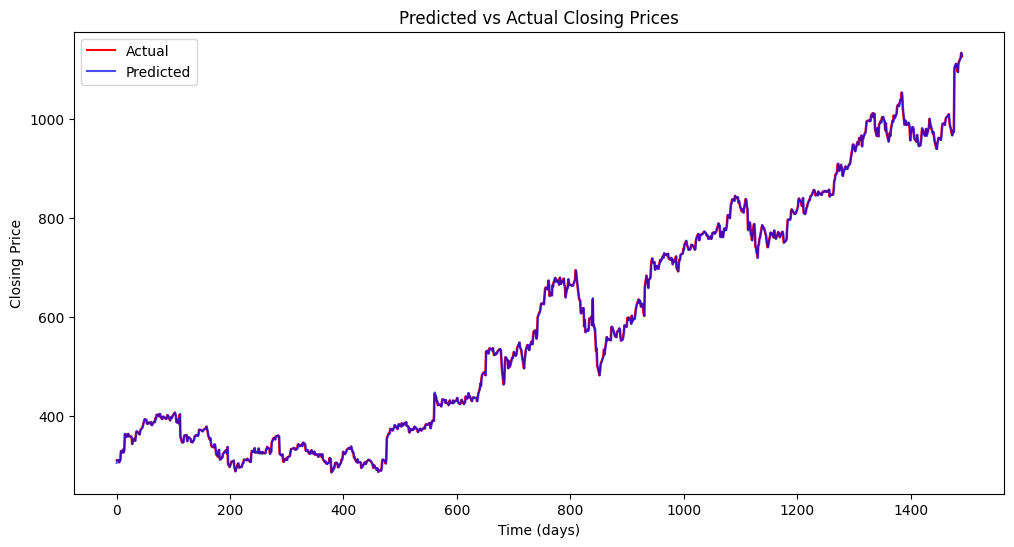

In [192]:
# Prepare predictions
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
y_pred = X_test.dot(theta_learned)

# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual', color='red')
plt.plot(y_pred, label='Predicted', color='blue', alpha=0.7)
plt.title('Predicted vs Actual Closing Prices')
plt.xlabel('Time (days)')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


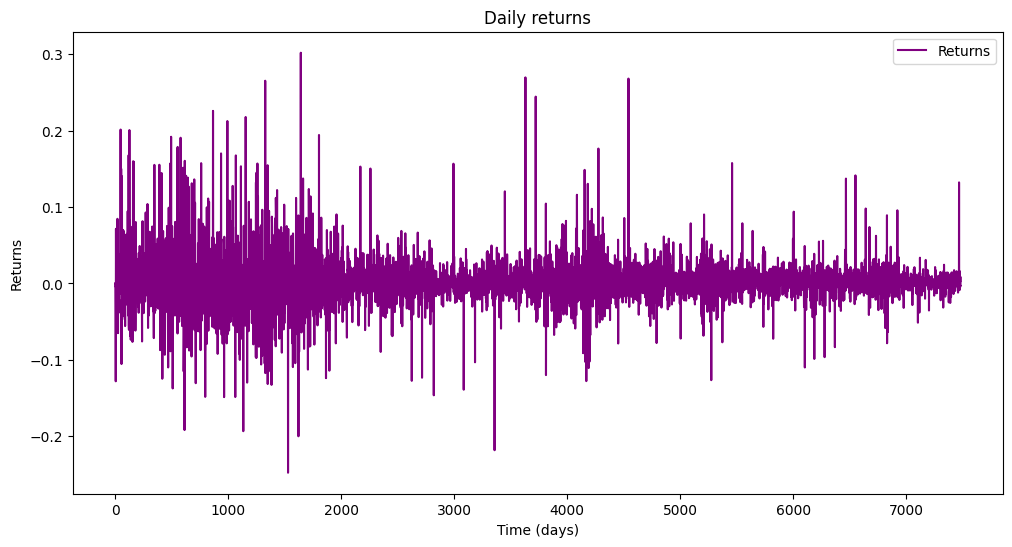

In [ ]:
def differencing(df, column):
    for stock in stock_names:
        returns_col = [0]
        req_col = df.loc[stock][column].values
        for date in range(len(req_col)-1):
            returns_col.append(req_col[date+1] - req_col[date])
        
        df.loc[(stock, slice(None)), f'{column}_difference'] = returns_col
    return df

differencing(df_full, 'Close')
# didn't give constant standard deviation, so I used daily returns instead

plt.figure(figsize=(12,6))
plt.plot(df_full['Close_daily_returns'].values, label='Returns', color='purple')
plt.title('Daily returns')
plt.xlabel('Time (days)')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [ ]:
# start with an AR-only model to get initial error estimates
ar_lags = 5
ma_lags = 4

returns = train_data['Close_daily_returns'].values

X_ar = []   # to store values of closing price for the last ar_lags days
y_ar = []   # to store today's closing price value

for t in range(ar_lags, len(returns)):
    X_ar.append(returns[t-ar_lags:t][::-1])
    y_ar.append(returns[t])

X_ar = np.array(X_ar)                               # convert to np array
X_ar = np.column_stack([np.ones(len(X_ar)), X_ar])  # add intercept term
theta_ar = np.linalg.inv(X_ar.T @ X_ar) @ (X_ar.T @ y_ar)    # used closed form soln instead of gradient descent

# calculate initial errors
preds_ar = X_ar @ theta_ar
errors = np.zeros(len(returns))
errors[ar_lags:len(preds_ar)+ar_lags] = returns[ar_lags:] - preds_ar


In [ ]:
# iterative ARMA fitting with initialized errors
X = []
y = []

for t in range(ar_lags, len(returns)):
    ar_terms = returns[t-ar_lags:t][::-1]
    ma_terms = errors[t-ma_lags:t][::-1]
    X.append(np.concatenate([ar_terms, ma_terms]))
    y.append(returns[t])

X = np.array(X)
X_with_intercept = np.column_stack([np.ones(len(X)), X])

# initialise with a small number instead of 0, so that a matrix to be inverted is not singular.
small_num = 1e-5
identity = np.eye(X_with_intercept.shape[1])
theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept + small_num * identity) @ (X_with_intercept.T @ y)

# now we iterate to refine errors (now with better initialization)
for iteration in range(100):
    preds = X_with_intercept @ theta
    residuals = y - preds
    
    # Update errors only for the relevant time indices
    error_idx_start = max(ar_lags, ma_lags)
    errors[error_idx_start:error_idx_start+len(residuals)] = residuals
    
    # Rebuild features with updated errors
    X = []
    for t in range(max(ar_lags, ma_lags), len(returns)):
        ar_terms = returns[t-ar_lags:t][::-1]
        ma_terms = errors[t-ma_lags:t][::-1]
        X.append(np.concatenate([ar_terms, ma_terms]))
    
    X = np.array(X)
    X_with_intercept = np.column_stack([np.ones(len(X)), X])
    theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept + small_num * identity) @ (X_with_intercept.T @ y)

# the final coefficients.
intercept = theta[0]
ar_coefs = theta[1:1+ar_lags]
ma_coefs = theta[1+ar_lags:]


In [ ]:
# Add intercept
X_with_intercept = np.column_stack([np.ones(len(X)), X])

# Initial fit (ignoring MA terms for the first iteration)
theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ (X_with_intercept.T @ y)

for iteration in range(5):  # A few iterations to refine MA terms
    preds = X_with_intercept @ theta
    residuals = y - preds
    # Update errors for the next iteration
    errors[max(ar_lags, ma_lags):] = residuals
    # Rebuild X with updated errors
    X = []
    for t in range(max(ar_lags, ma_lags), len(returns)):
        ar_terms = returns[t-ar_lags:t][::-1]
        ma_terms = errors[t-ma_lags:t][::-1]
        X.append(np.concatenate([ar_terms, ma_terms]))
    X = np.array(X)
    X_with_intercept = np.column_stack([np.ones(len(X)), X])
    # Refit
    theta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ (X_with_intercept.T @ y)

intercept = theta[0]
ar_coefs = theta[1:1+ar_lags]
ma_coefs = theta[1+ar_lags:]
print("Intercept:", intercept)
print("AR Coefs:", ar_coefs)
print("MA Coefs:", ma_coefs)


Intercept: 0.001657909133153417
AR Coefs: [ 0.13635438 -0.32612136 -0.19387477  0.19289301 -0.01122435]
MA Coefs: [-0.05917204  0.33273777  0.23097333 -0.18484741]


In [ ]:
train, test = df_full['Close_daily_returns'][:int(0.8*len(returns))], df_full['Close_daily_returns'][int(0.8*len(returns)):]
history = list(train)
errors = list(errors)  # errors aligned with train

predictions = []

for t in range(len(test)):
    # Prepare AR terms from history
    ar_terms = history[-ar_lags:][::-1]
    # Prepare MA terms from errors
    ma_terms = errors[-ma_lags:][::-1]
    
    features = np.concatenate([[1], ar_terms, ma_terms])
    pred = features @ theta
    predictions.append(pred)
    
    # Update history and errors with actual test observation
    obs = test[t]
    history.append(obs)
    errors.append(obs - pred)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20988\1103308181.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


In [198]:
test = pd.DataFrame(test)
test['predicted_daily_returns'] = np.array(predictions)
test['actual_closing_price'] = df_full['Close'][int(0.8*len(returns)):]
test.head()


Close_daily_returns  predicted_daily_returns  \
Ticker Date                                                       
amzn   2010-06-26            -0.008815                 0.015704   
       2010-06-27            -0.008894                 0.001234   
       2010-06-28            -0.008974                -0.018535   
       2010-06-29            -0.078014                 0.002130   
       2010-06-30             0.005985                 0.003834   

                   actual_closing_price  
Ticker Date                              
amzn   2010-06-26            119.933333  
       2010-06-27            118.866667  
       2010-06-28            117.800000  
       2010-06-29            108.610000  
       2010-06-30            109.260000

In [199]:
# convert back to closing prices
inverse_daily_returns(test, 'actual_closing_price', 'predicted_daily_returns')
test = test[test['predicted_daily_returns_inverse'] != 0]
test.head()


Close_daily_returns  predicted_daily_returns  \
Ticker Date                                                       
amzn   2010-06-27            -0.008894                 0.001234   
       2010-06-28            -0.008974                -0.018535   
       2010-06-29            -0.078014                 0.002130   
       2010-06-30             0.005985                 0.003834   
       2010-07-01             0.015559                 0.005326   

                   actual_closing_price  predicted_daily_returns_inverse  
Ticker Date                                                               
amzn   2010-06-27            118.866667                       120.081285  
       2010-06-28            117.800000                       116.663433  
       2010-06-29            108.610000                       118.050904  
       2010-06-30            109.260000                       109.026454  
       2010-07-01            110.960000                       109.841866

In [200]:
def find_cost(df, col1, col2):
    col1 = df[col1].values
    col2 = df[col2].values
    cost = np.nanmean(np.square(col1 - col2))
    return cost

find_cost(test, 'actual_closing_price', 'predicted_daily_returns_inverse')


np.float64(41.826442026159754)

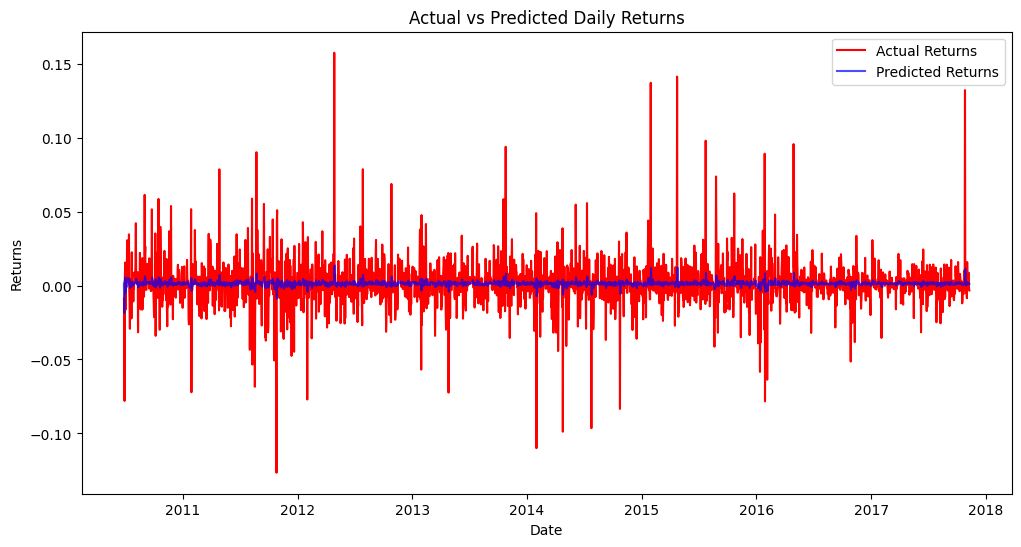

In [201]:
plt.figure(figsize=(12,6))
plt.plot(test.index.get_level_values('Date'), test['Close_daily_returns'], 
         label='Actual Returns', color='red')
plt.plot(test.index.get_level_values('Date'), test['predicted_daily_returns'], 
         label='Predicted Returns', color='blue', alpha=0.7)
plt.title('Actual vs Predicted Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


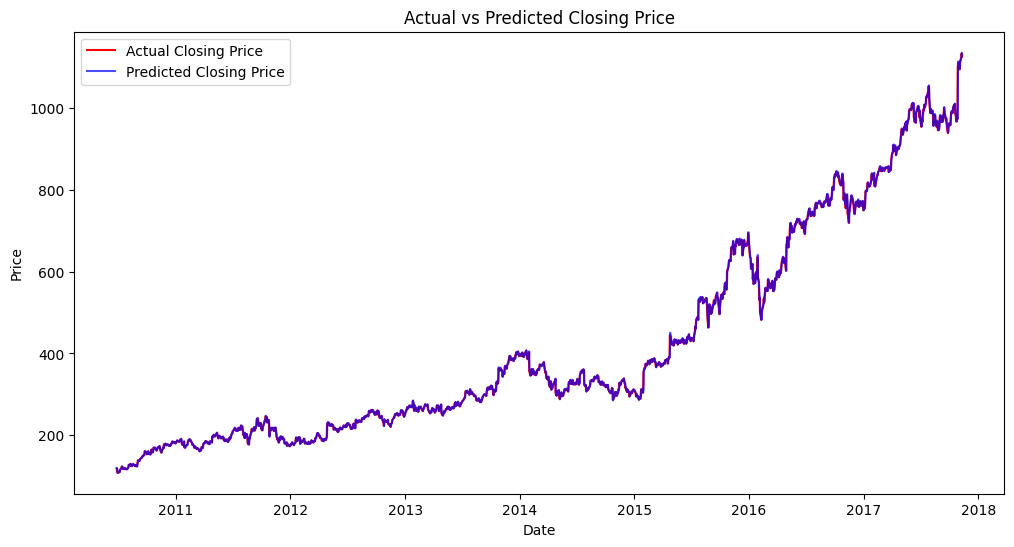

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(test.index.get_level_values('Date'), test['actual_closing_price'], 
         label='Actual Closing Price', color='red')
plt.plot(test.index.get_level_values('Date'), test['predicted_daily_returns_inverse'], 
         label='Predicted Closing Price', color='blue', alpha=0.7)
plt.title('Actual vs Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [213]:
actual_change = test['actual_closing_price'].values[1:] - test['actual_closing_price'].values[:-1]
predicted_change = test['predicted_daily_returns_inverse'].values[1:] - test['predicted_daily_returns_inverse'].values[:-1]

correct_direction = np.sum(np.sign(actual_change) == np.sign(predicted_change))
total = len(actual_change)
print(f"Correct predictions: {correct_direction}/{total}")
print(f"Accuracy: {100*correct_direction/total:.2f}%")


Correct predictions: 1718/2693
Accuracy: 63.80%
